In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df= pd.read_csv(r"D:\ML projects\Telco customer churn\pipeline\WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df["gender"].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [7]:
df=df.drop(columns=["customerID"])
for col in df.columns:
    print(f"\n{col}:\n{df[col].value_counts()}")



gender:
gender
Male      3555
Female    3488
Name: count, dtype: int64

SeniorCitizen:
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

Partner:
Partner
No     3641
Yes    3402
Name: count, dtype: int64

Dependents:
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

tenure:
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

PhoneService:
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

MultipleLines:
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

InternetService:
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

OnlineSecurity:
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

OnlineBackup:
OnlineBackup
No                     3088
Yes                

In [8]:
df_yes=df[df["Churn"]=="Yes"]
df_no=df[df["Churn"]=="No"]

C:\Users\aditya\AppData\Local\Temp\ipykernel_18912\1211651130.py:14: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
d:\ML projects\Telco customer churn\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


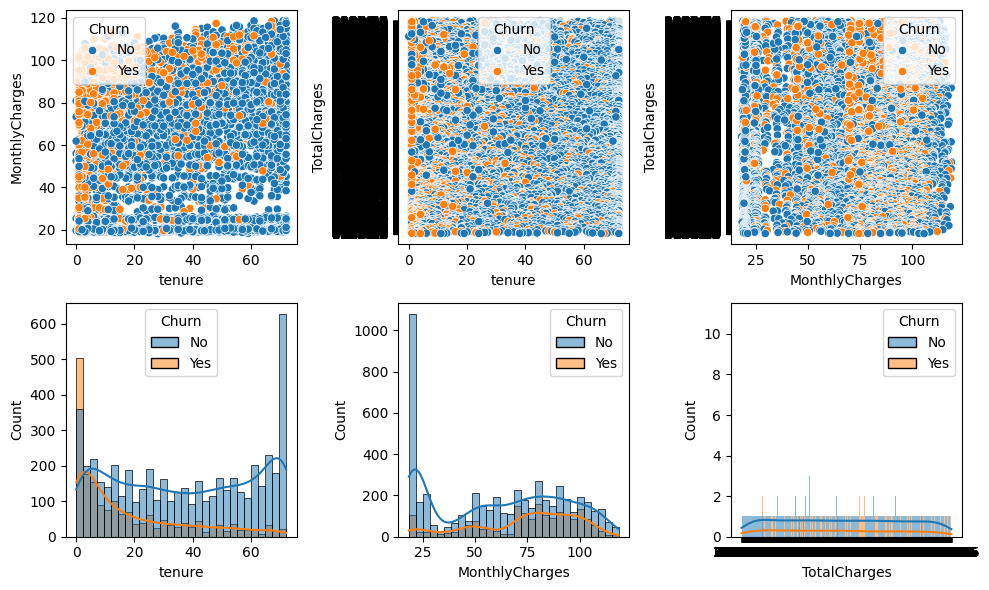

In [9]:
plt.figure(figsize=(10,6))
plt.subplot(2,3,1)
sns.scatterplot(data=df, x="tenure", y="MonthlyCharges", hue="Churn")
plt.subplot(2,3,2)
sns.scatterplot(data=df, x="tenure", y="TotalCharges", hue="Churn")
plt.subplot(2,3,3)
sns.scatterplot(data=df, x="MonthlyCharges", y="TotalCharges", hue="Churn")         
plt.subplot(2,3,4)
sns.histplot(data=df, x="tenure", hue="Churn", kde=True, bins=30)
plt.subplot(2,3,5) 
sns.histplot(data=df, x="MonthlyCharges", hue="Churn", kde=True, bins=30)
plt.subplot(2,3,6)
sns.histplot(data=df, x="TotalCharges", hue="Churn", kde=True, bins=30)
plt.tight_layout()
plt.show()

<BarContainer object of 3 artists>

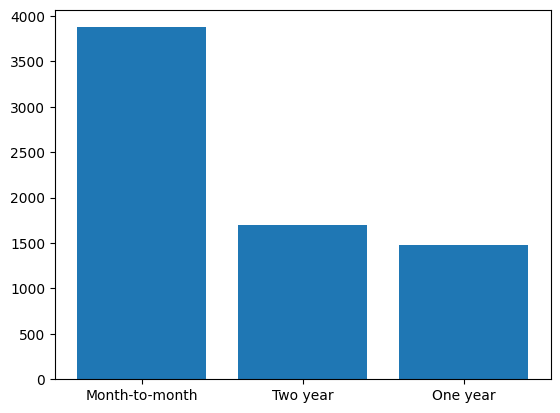

In [10]:
plt.bar(df["Contract"].value_counts().index, df["Contract"].value_counts().values)

In [11]:
df["gender"].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

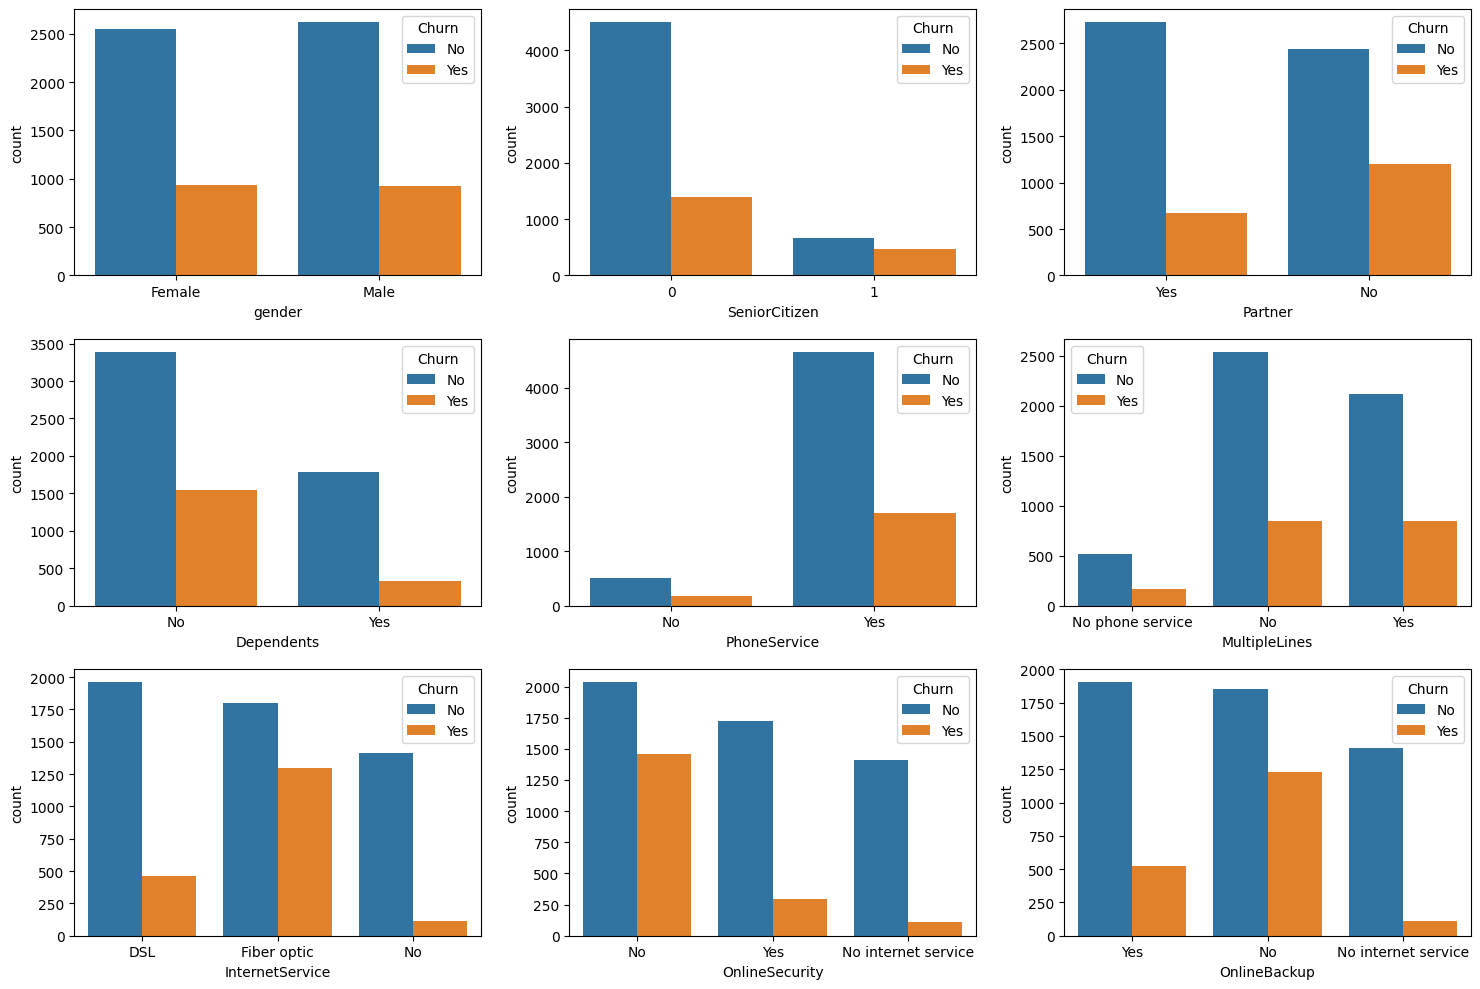

In [12]:
plt.figure(figsize=(15,10))
plt.subplot(3,3,1)
sns.countplot(data=df, x="gender", hue="Churn")
plt.subplot(3,3,2)  
sns.countplot(data=df, x="SeniorCitizen", hue="Churn")
plt.subplot(3,3,3)  
sns.countplot(data=df, x="Partner", hue="Churn")
plt.subplot(3,3,4)
sns.countplot(data=df, x="Dependents", hue="Churn")
plt.subplot(3,3,5)
sns.countplot(data=df, x="PhoneService", hue="Churn")
plt.subplot(3,3,6)
sns.countplot(data=df, x="MultipleLines", hue="Churn")
plt.subplot(3,3,7)
sns.countplot(data=df, x="InternetService", hue="Churn")
plt.subplot(3,3,8)
sns.countplot(data=df, x="OnlineSecurity", hue="Churn")
plt.subplot(3,3,9)
sns.countplot(data=df, x="OnlineBackup", hue="Churn")
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.hist(df["tenure"], bins=30)
plt.subplot(2,3,2)
plt.hist(df["MonthlyCharges"], bins=30)
plt.subplot(2,3,3)
plt.hist(df["TotalCharges"], bins=30)
plt.subplot(2,3,4)
sns.boxplot(df["tenure"])
plt.subplot(2,3,5)
sns.boxplot(df["MonthlyCharges"])
plt.subplot(2,3,6)
sns.boxplot(df["TotalCharges"])
plt.tight_layout()
plt.show()